<a href="https://colab.research.google.com/github/Kolexx/Kolexx/blob/main/Data_and_Decision_Making_Assessement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ecommerce_data = pd.read_csv('data.csv', encoding='Windows-1252')
ecommerce_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
print(ecommerce_data.isnull().sum())

InvoiceNo          0
StockCode          0
Description      280
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31832
Country            0
dtype: int64


In [7]:
ecommerce_data = ecommerce_data.dropna(subset=['Description', 'CustomerID', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'],  inplace= False)


In [8]:
print(ecommerce_data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
year           0
dtype: int64


In [9]:
ecommerce_data.drop_duplicates()
ecommerce_data['year'] = pd.to_datetime(ecommerce_data['InvoiceDate']).dt.year
ecommerce_data['year'].head()


,year
0,2010
1,2010
2,2010
3,2010
4,2010


In [11]:
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
87644,543688,22828,REGENCY MIRROR WITH SHUTTERS,2,2/11/2011 11:36,145.00,15270.0,United Kingdom,2011
87645,543691,35004B,SET OF 3 BLACK FLYING DUCKS,48,2/11/2011 11:38,4.65,17924.0,United Kingdom,2011
87646,543693,22469,HEART OF WICKER SMALL,40,2/11/2011 11:40,1.45,12897.0,United Kingdom,2011
87647,543693,22470,HEART OF WICKER LARGE,24,2/11/2011 11:40,2.95,12897.0,United Kingdom,2011


In [13]:
ecommerce_data['total_value'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']
median_unit_price = ecommerce_data['UnitPrice'].median()
median_quantity = ecommerce_data['Quantity'].median()
median_total_value = median_unit_price * median_quantity
ecommerce_data['HighValue'] = (ecommerce_data['total_value'] > median_total_value).astype(int)
ecommerce_data



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,total_value,HighValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
...,...,...,...,...,...,...,...,...,...,...,...
87644,543688,22828,REGENCY MIRROR WITH SHUTTERS,2,2/11/2011 11:36,145.00,15270.0,United Kingdom,2011,290.00,1
87645,543691,35004B,SET OF 3 BLACK FLYING DUCKS,48,2/11/2011 11:38,4.65,17924.0,United Kingdom,2011,223.20,1
87646,543693,22469,HEART OF WICKER SMALL,40,2/11/2011 11:40,1.45,12897.0,United Kingdom,2011,58.00,1
87647,543693,22470,HEART OF WICKER LARGE,24,2/11/2011 11:40,2.95,12897.0,United Kingdom,2011,70.80,1


In [14]:
ecommerce_data['year'] = pd.to_numeric(ecommerce_data['year'], errors='coerce').astype('Int64')
print(ecommerce_data['year'].dtype)

Int64


In [15]:
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID,year,total_value,HighValue
count,55910.000000,55910.000000,55910.000000,55910.0,55910.000000,55910.000000
mean,11.760705,3.281204,15351.550367,2010.519764,21.230433,0.617278
std,448.201646,10.546353,1770.622167,0.499614,469.638556,0.486056
min,-74215.000000,0.000000,12346.000000,2010.0,-77183.600000,0.000000
25%,2.000000,1.250000,13871.000000,2010.0,4.250000,0.000000
50%,4.000000,1.950000,15311.000000,2011.0,10.900000,1.000000
75%,12.000000,3.750000,17001.000000,2011.0,19.500000,1.000000
max,74215.000000,1715.850000,18283.000000,2011.0,77183.600000,1.000000


In [16]:
unique_countries = ecommerce_data['Country'].unique()
unique_countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon'],
      dtype=object)

In [17]:
import numpy as np
from pandas_datareader import wb

In [18]:
GDP_growth = "NY.GDP.MKTP.KD.ZG"
Inflation_consumer_prices = 'FP.CPI.TOTL.ZG'
Consumer_price_index = 'FP.CPI.TOTL'

In [19]:
countries = ["GB", "FR", "AU", "NL", "DE", "NO", "IE", "CH", "ES", "PL", "PT", "IT", "BE", "LT", "JP", "IS", "GB", "DK", "CY", "SE", "AT", "IL", "FI", "BH", "GR", "HK", "SG", "LB", "AE", "SA", "CZ", "CA", "BR", "US", "MT", "ZA"
]

In [20]:
df1 = wb.download(indicator=GDP_growth, country=countries, start=2010, end=2023)
df2 = wb.download(indicator=Inflation_consumer_prices, country=countries, start=2010, end=2023)
df3 = wb.download(indicator=Consumer_price_index, country=countries, start=2010, end=2023)


In [21]:
# Reset index to move multi-index levels to columns
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)

# Rename the 'date' column to 'year'
df1.rename(columns={'date': 'year', GDP_growth: 'GDP_growth'}, inplace=True)
df2.rename(columns={'date': 'year', Inflation_consumer_prices: 'Inflation_consumer_prices'}, inplace=True)
df3.rename(columns={'date': 'year', Consumer_price_index: 'Consumer_price_index'}, inplace=True)



In [22]:
# Merge DataFrames on 'country' and 'year'
economic_indicators = pd.merge(df1, df2, on=['country', 'year'], how='outer')
economic_indicators = pd.merge(economic_indicators, df3, on=['country', 'year'], how='outer')

In [23]:
economic_indicators = economic_indicators.rename(columns={'country': 'Country'})
economic_indicators.head()

,Country,year,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,United Arab Emirates,2023,3.403857,NaN,NaN
1,United Arab Emirates,2022,7.850418,4.827889,117.541088
2,United Arab Emirates,2021,4.354755,-0.013860,112.127688
3,United Arab Emirates,2020,-4.957052,-2.079403,112.143231
4,United Arab Emirates,2019,1.108348,-1.931081,114.524661


In [24]:
economic_indicators = economic_indicators.dropna(subset=['Country', 'year', 'GDP_growth',	'Inflation_consumer_prices',	'Consumer_price_index'],  inplace= False)
# Convert 'year' to integer in both DataFrames
economic_indicators['year'] = pd.to_numeric(economic_indicators['year']).astype('Int64')
print(economic_indicators['year'].dtype)



Int64


<ipython-input-24-8e468c1f0c15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_indicators['year'] = pd.to_numeric(economic_indicators['year']).astype('Int64')


In [26]:
df = pd.merge(ecommerce_data, economic_indicators, on=['Country', 'year'], how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30,1,2.238689,2.492655,100.000000
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00,1,2.238689,2.492655,100.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55905,543688,22828,REGENCY MIRROR WITH SHUTTERS,2,2/11/2011 11:36,145.00,15270.0,United Kingdom,2011,290.00,1,1.145102,3.856112,103.856112
55906,543691,35004B,SET OF 3 BLACK FLYING DUCKS,48,2/11/2011 11:38,4.65,17924.0,United Kingdom,2011,223.20,1,1.145102,3.856112,103.856112
55907,543693,22469,HEART OF WICKER SMALL,40,2/11/2011 11:40,1.45,12897.0,United Kingdom,2011,58.00,1,1.145102,3.856112,103.856112
55908,543693,22470,HEART OF WICKER LARGE,24,2/11/2011 11:40,2.95,12897.0,United Kingdom,2011,70.80,1,1.145102,3.856112,103.856112


In [27]:
df = df.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'year'], axis=1)

In [28]:
print(df.isnull().sum())

total_value                    0
HighValue                      0
GDP_growth                   699
Inflation_consumer_prices    699
Consumer_price_index         699
dtype: int64


In [29]:
df = df.dropna(subset=[ 'GDP_growth', 'Inflation_consumer_prices', 'Consumer_price_index'],  inplace= False)


In [30]:
print(df.isnull().sum())

total_value                  0
HighValue                    0
GDP_growth                   0
Inflation_consumer_prices    0
Consumer_price_index         0
dtype: int64


In [32]:
df.drop_duplicates()

,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,15.30,1,2.238689,2.492655,100.000000
1,20.34,1,2.238689,2.492655,100.000000
2,22.00,1,2.238689,2.492655,100.000000
5,15.30,1,2.238689,2.492655,100.000000
6,25.50,1,2.238689,2.492655,100.000000
...,...,...,...,...,...
55894,264.00,1,1.145102,3.856112,103.856112
55900,283.20,1,1.145102,3.856112,103.856112
55902,594.00,1,1.145102,3.856112,103.856112
55903,382.50,1,1.145102,3.856112,103.856112


In [31]:
df.describe()

,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
count,55211.000000,55211.000000,55211.000000,55211.000000,55211.000000
mean,20.914277,0.613610,1.731570,3.074449,101.913077
std,472.388038,0.486926,0.816849,0.791114,1.884684
min,-77183.600000,0.000000,-10.149315,-0.728243,99.727544
25%,4.250000,0.000000,1.145102,2.492655,100.000000
50%,10.500000,1.000000,2.192701,2.492655,102.075173
75%,19.500000,1.000000,2.238689,3.856112,103.856112
max,77183.600000,1.000000,6.214934,5.396731,105.247793


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Prepare features and target variable
features = ['GDP_growth', 'Inflation_consumer_prices', 'Consumer_price_index']
X = df[features]  # Feature data
y = df['HighValue']      # Target variable

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [96]:
# Initialize and train the model
linreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_predlinreg = linreg.predict(X_test_scaled)
mse_linreg = mean_squared_error(y_test, y_predlinreg)
r2_linreg = r2_score(y_test, y_predlinreg)

print(f"Linear Regression MSE: {mse_linreg}, R2: {r2_linreg}")


Linear Regression MSE: 0.2311071960349291, R2: 0.021716280660472043


In [92]:
linreg.predict([[2.238689, 2.492655, 100]])

array([14.95595758])

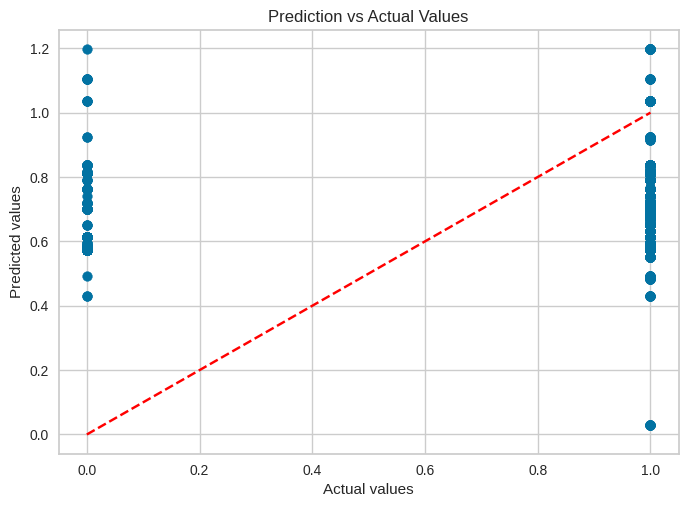

In [111]:
plt.scatter(y_test, y_predlinreg)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction vs Actual Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.show()

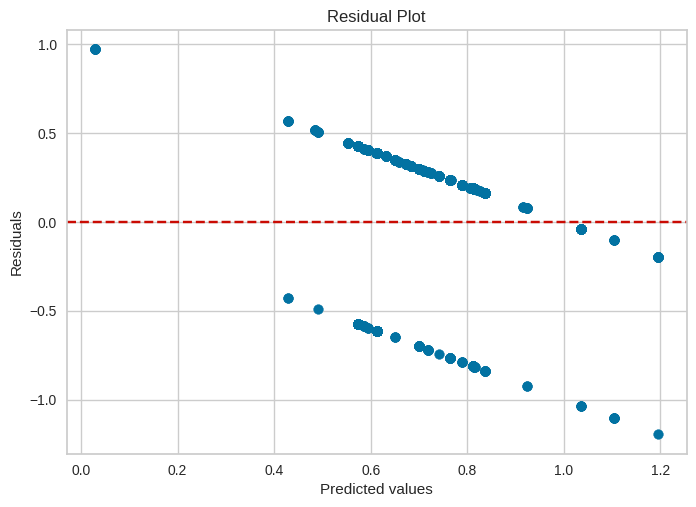

In [113]:
residuals = y_test - y_predlinreg
plt.scatter(y_predlinreg, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Figure size 800x550 with 0 Axes>

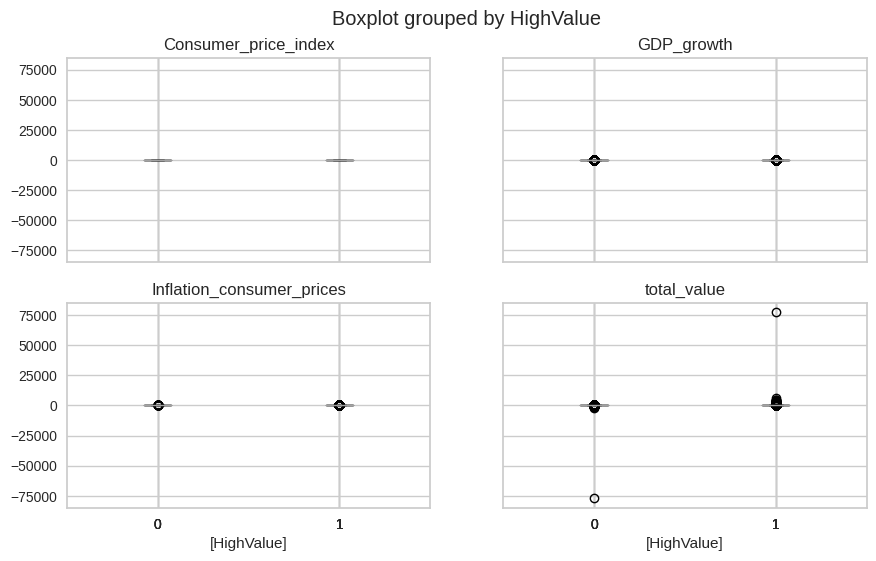

In [118]:
plt.figure()
df.boxplot(by='HighValue', figsize=(10, 6))
plt.show()

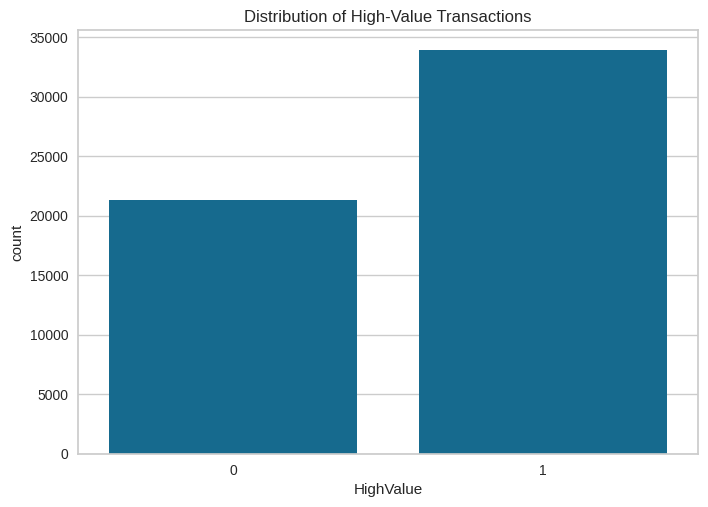

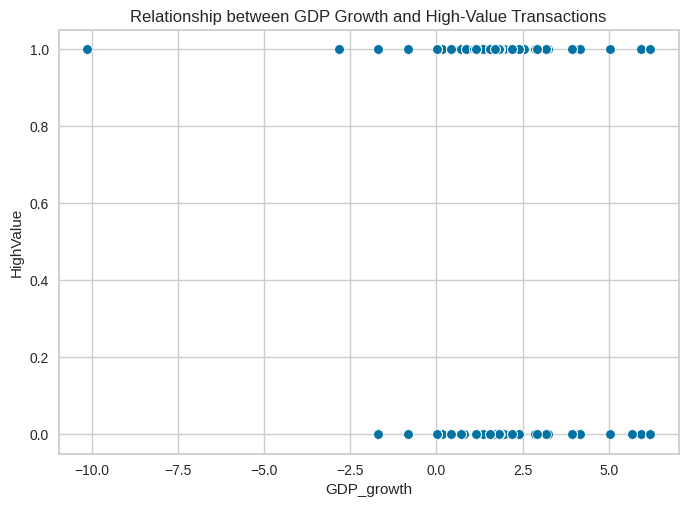

In [109]:
# Plot the distribution of the target variable
sns.countplot(x='HighValue', data=df)
plt.title('Distribution of High-Value Transactions')
plt.show()

# Plot the relationship between GDP growth and high-value transactions
sns.scatterplot(x='GDP_growth', y='HighValue', data=df)
plt.title('Relationship between GDP Growth and High-Value Transactions')
plt.show()


In [44]:
df.groupby('HighValue').size()

,0
HighValue,
0,21333
1,33878


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("KNeighborsClassifier accu imported")

KNeighborsClassifier accu imported


In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [47]:
knn.predict([[5.1, 3.5, 1.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [62]:
knn.fit(X, np.ravel(y))
y_pred_knn5 = knn.predict(X)
metrics.accuracy_score(y, y_pred_knn5)

0.5946097697922516

In [63]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, np.ravel(y))
y_pred_knn15 = knn.predict(X)
metrics.accuracy_score(y, y_pred_knn15)

0.5946097697922516

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, np.ravel(y))
y_pred_knn1= knn.predict(X)
metrics.accuracy_score(y, y_pred_knn1)

0.5402003223995219

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn5 = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6173141356515439

In [78]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred_knn15 = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn15)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6173141356515439

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


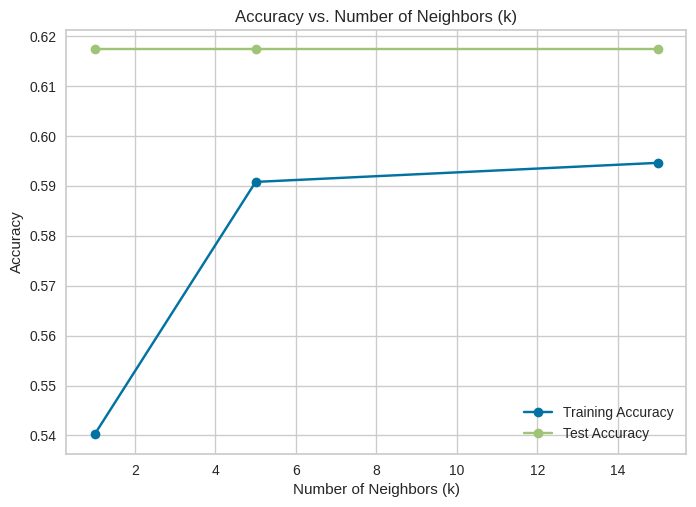

In [119]:
import matplotlib.pyplot as plt

k_values = [1, 5, 15]
train_accuracies = [accuracy_score(y, KNeighborsClassifier(n_neighbors=k).fit(X, np.ravel(y)).predict(X)) for k in k_values]
test_accuracies = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).predict(X_test)) for k in k_values]

plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


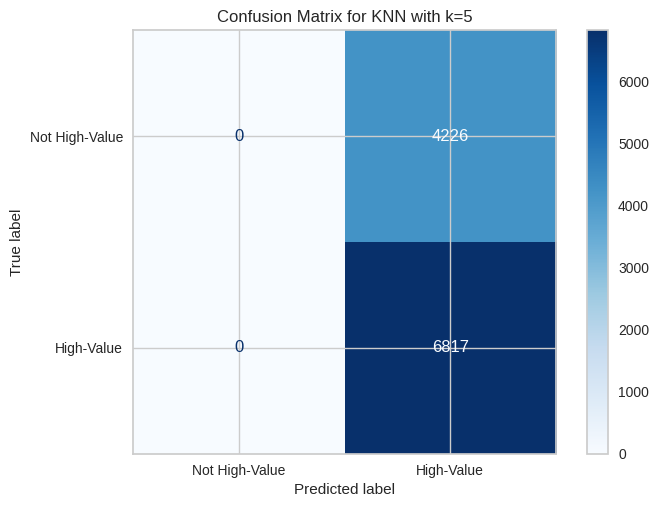

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not High-Value', 'High-Value'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with k=5')
plt.show()


In [56]:
from sklearn.linear_model import LogisticRegression
print("LogisticRegression imported")

LogisticRegression imported


In [57]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X, y)

LogisticRegression(max_iter=200)

In [58]:
logreg.predict([[5.1, 3.5, 1.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [59]:
y_pred = logreg.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
metrics.accuracy_score(y, y_pred)

0.610874644545471

In [83]:
y_pred_test = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.6147785927737028

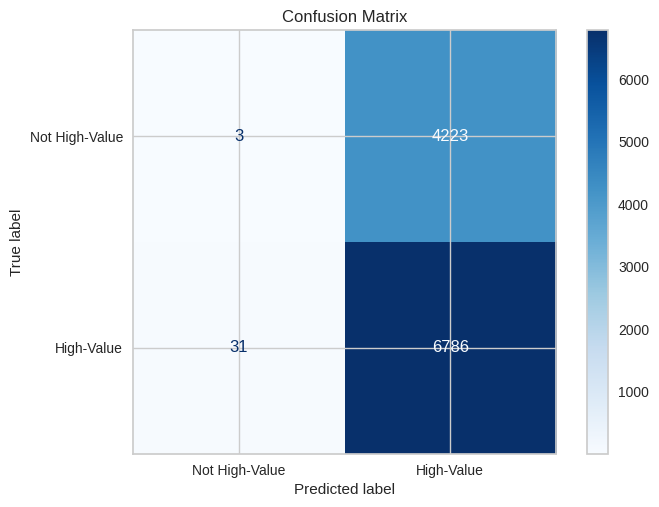

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not High-Value', 'High-Value'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


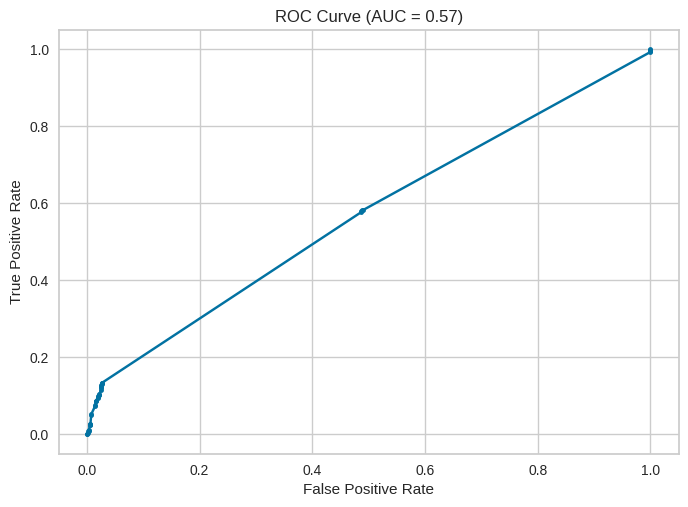

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()


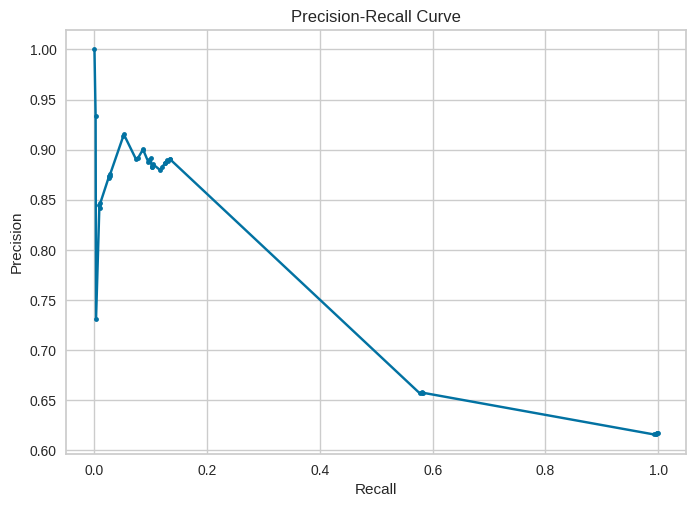

In [116]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-123-db0629b534c5>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_data_scaled[0, 0], new_data_scaled[0, 1], c='black', edgecolor='k', marker='x', s=100, label='New Data Point')


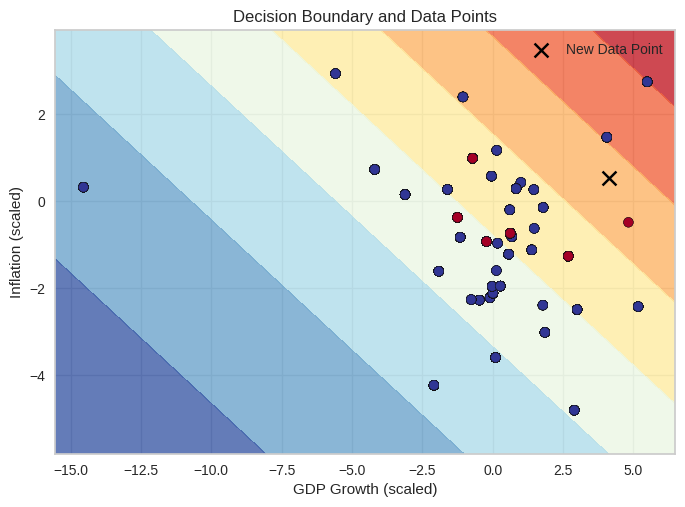

In [90]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


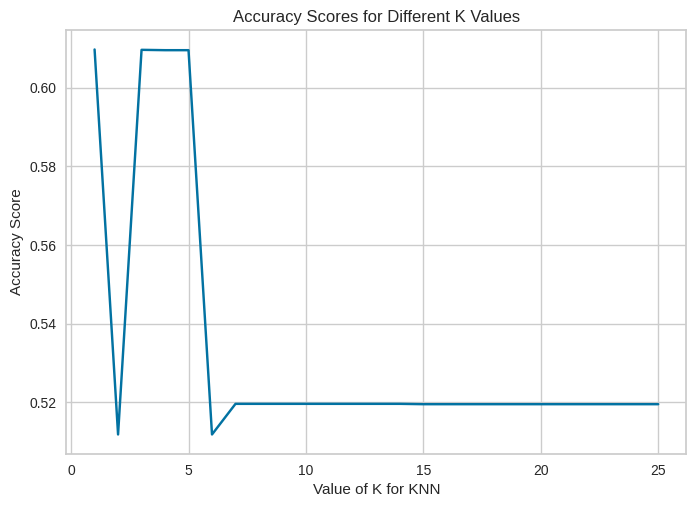

In [91]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different K Values')
plt.show()